# PROJET SUR LE DATASET D'APPROBATION D'OCTROIE DE CREDIT

# I.IMPORTATION DES PACKAGES

In [4024]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [4025]:
# importation de WARNING
import warnings
warnings.filterwarnings("ignore")

# II. MANIPULATION DES DONNEES

# II.1. Téléchargement du fichier de dataset dépuis la source

In [4026]:
df = pd.read_csv("../BISIMWA M DESTIN_Labo_LoanApprovalPrediction/LoanApprovalPrediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4027]:
# Détail du dataset(598 lignes et 13 colones)
df.shape

(598, 13)

In [4028]:
# Les noms des colones dont dispose le dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# II.2. Pré-traitement des données

In [4029]:
# Ici ça determine combien sont des ligne de YES(le crédit est accepté) et NON(le crédit est refusé)
# Donc la f(x) < .VALUE_COUNTS()> ne fait que compter les lignes de la colone cible
df['Loan_Status'].value_counts()

Loan_Status
Y    411
N    187
Name: count, dtype: int64

In [4030]:
df['Married'].value_counts()

Married
Yes    388
No     210
Name: count, dtype: int64

In [4031]:
# Ici on donne les détails de la colone EDUCATION
# Cette colone ne dispose que 2 élements(1. Graduate et 2. Not gratuate)
# Donc la f(x) < .UNIQUE> ne donne que les élements coposants une colone cible
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [4032]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [4033]:
# Pour identifier les colonnes ayant des valeurs vides et cobien des vides pour chaque colonne
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

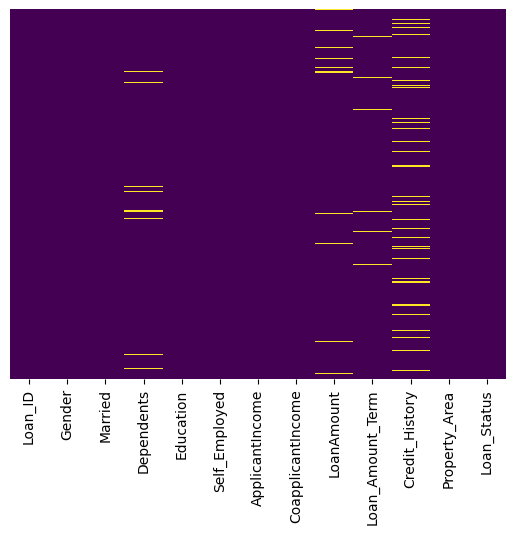

In [4034]:
# Pour vérifier les valeurs manquantes
# pour False la première lettre ne doit en majuscule
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [4035]:
# ça donne les informations générales sur le dataset et détermine le type de données pour chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [4036]:
# Ici nous c'est pour imputer les valeurs aux certaines colonnes ayant des vaeurs manquantes
# Nous, ns avons opté pour la moyenne(mean), mais aussi utiliser la medaine
# Alors on prend ligne et colonne et on calcul la moyenne et c'est cette moyenne qu'on va imputer partout où il ya vide sur une klconque colonne
# NB: chaque colonne aura sa propre moyenne selon ses données et le calcul faite 
df['Dependents'].fillna(df['Dependents'].mean(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [4037]:
# Ici on passe à la vérification pour voir si toutes les valeurs manquantes ont été imputer
# Comme il ya 0 c'est-à-dire que pas plus des valeurs manquantes dans toutes les colonnes
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4038]:
# Pour lire encore le tableau à son entiéreté
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [4039]:
# Ici c pour mapper les données catégorielles en données numeriques
# Par exemple MALE=1 et FEMALE=2
#             MARRIED=1 ET NO MARRIED=0
df['Gender']=np.where(df['Gender']=='Male',1,0)
df['Married']=np.where(df['Married']=='Yes',1,0)
df['Education']=np.where(df['Education']=='Graduate',1,0)
df['Self_Employed']=np.where(df['Self_Employed']=='Yes',1,0)
df['Loan_Status']=np.where(df['Loan_Status']=='Y',1,0)

In [4040]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,144.968804,360.0,1.0,Urban,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,0,0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,1
594,LP002979,1,1,3.0,1,0,4106,0.0,40.000000,180.0,1.0,Rural,1
595,LP002983,1,1,1.0,1,0,8072,240.0,253.000000,360.0,1.0,Urban,1
596,LP002984,1,1,2.0,1,0,7583,0.0,187.000000,360.0,1.0,Urban,1


In [4041]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [4042]:
# On crée un dictionnaire pour permettre à MAPPER la colonne Property_Area
# NB: Ns créons un dictionnaire pcq cette colonnes a 3 élements
#     or c'est impossible de faire en binaire, d'où il faut créer un dictionnaire et attribuer de valeurs numériques pour chaque élement
Property_Area_mapp={
    'Urban':0,
    'Rural':1,
    'Semiurban':2,
    
}

In [4043]:
# Appiquons alors le mapping sur le dataset
# La colonne Property_Area a changée ses données en 0 et 1
df['Property_Area']= df['Property_Area'].map(Property_Area_mapp)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,144.968804,360.0,1.0,0,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,0,0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
594,LP002979,1,1,3.0,1,0,4106,0.0,40.000000,180.0,1.0,1,1
595,LP002983,1,1,1.0,1,0,8072,240.0,253.000000,360.0,1.0,0,1
596,LP002984,1,1,2.0,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [4044]:
# Appel à la MATRICE DE CORRELATION
df = df.drop(['Loan_ID'], axis = 1)

<Axes: >

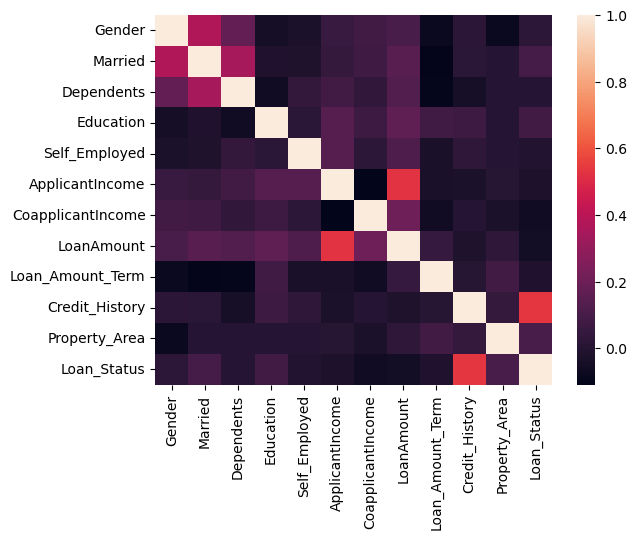

In [4045]:
sns.heatmap(df.corr(), annot=False)

# II.3. Division des données

In [4046]:
from sklearn.model_selection import train_test_split
X = df.drop(['Loan_Status'], axis = 1)
y = df.iloc[:,-1]
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)
print("X_train:", X_train.shape )
print("X_test:", X_test.shape )
print("Y_train:", y_train.shape )
print("Y_test:", y_test.shape )


X_train: (478, 11)
X_test: (120, 11)
Y_train: (478,)
Y_test: (120,)


# II.4. Sélection du Modèle ou Algorithme

In [4047]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()


In [4048]:
# Entrainement du modèle
lr_model.fit(X_train, y_train)

LogisticRegression()

In [4049]:
# Prédiction
y_predict_lr = lr_model.predict(X_test)
y_predict_lr

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [4050]:
# Evaluation du modèle
print("Accuracy de la Régression logistic:", 100 * accuracy_score(y_test,y_predict_lr))
print("MSE de la Regression logistic:", 100 * mean_squared_error(y_test,y_predict_lr))

Accuracy de la Régression logistic: 84.16666666666667
MSE de la Regression logistic: 15.833333333333332


[[19 14]
 [ 5 82]]


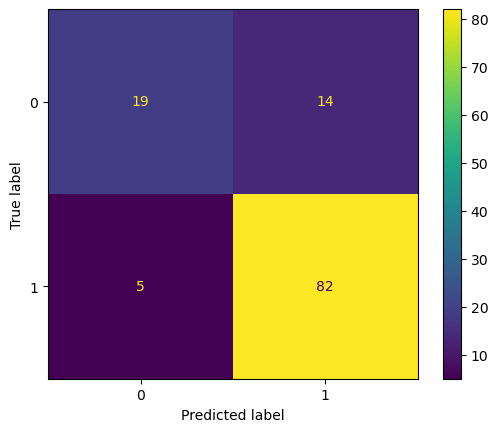

In [4051]:
print(confusion_matrix(y_test,y_predict_lr))
confus_matrix = ConfusionMatrixDisplay.from_estimator(lr_model,X_test, y_test, display_labels = ['0', '1'])

[[19 14]
 [ 5 82]]


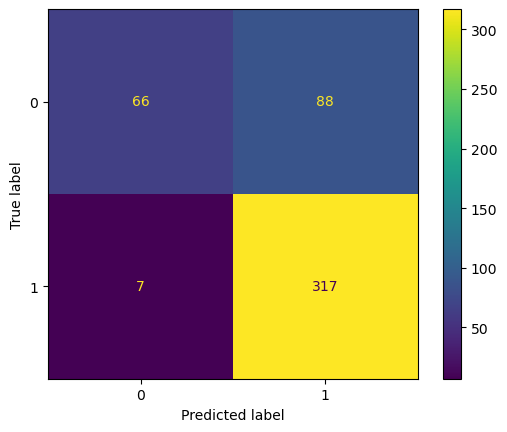

In [4052]:
print(confusion_matrix(y_test,y_predict_lr))
confus_matrix = ConfusionMatrixDisplay.from_estimator(lr_model,X_train, y_train, display_labels = ['0', '1'])

In [4053]:
print("Précision de la Régression logistic:", 100 * precision_score(y_test,y_predict_lr))
print("F1_score de la Regression logistic:", 100 * f1_score(y_test,y_predict_lr))
print("Recall de la Regression logistic:", 100 * recall_score(y_test,y_predict_lr))

print("MSE de la Regression logistic:", 100 * mean_squared_error(y_test,y_predict_lr))


Précision de la Régression logistic: 85.41666666666666
F1_score de la Regression logistic: 89.61748633879782
Recall de la Regression logistic: 94.25287356321839
MSE de la Regression logistic: 15.833333333333332


# III.   AVEC LE MODELE KNN

In [4054]:
from sklearn.neighbors import KNeighborsClassifier
Knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrainement du modèle

In [4055]:
Knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Prédiction du modèle

In [4056]:
y_predict_knn = Knn_model.predict(X_test)

# Evaluation du modèle

In [4057]:
print("Accuracy score de KNN model:", 100 * accuracy_score(y_test, y_predict_knn))
print("MSE du KNN model:", 100 * mean_squared_error(y_test,y_predict_knn))

Accuracy score de KNN model: 60.0
MSE du KNN model: 40.0


# IV.  AVEC LE MODELE RandomForest

In [4058]:
from sklearn.ensemble import RandomForestClassifier

In [4059]:
# Création de la variable portant le modèle
randomF_model = RandomForestClassifier(n_estimators = 7, criterion='entropy', random_state = 7)

# Entrainement du modèle

In [4060]:
randomF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7)

# Préduction du modèle

In [4061]:
y_predict_randomF_model = randomF_model.predict(X_test)

# Evaluation du modèle

In [4062]:
print("Accuracy score de RandomForest model:", 100 * accuracy_score(y_test, y_predict_randomF_model))
print("MSE du RandomForest model:", 100 * mean_squared_error(y_test,y_predict_randomF_model))

Accuracy score de RandomForest model: 79.16666666666666
MSE du RandomForest model: 20.833333333333336
